<a href="https://colab.research.google.com/github/Jaskirat1/CNN/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train.shape

(60000,)

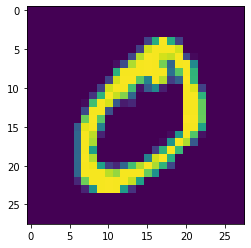

In [ ]:
plt.imshow(X_train[1])


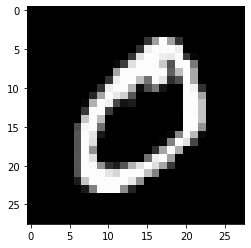

In [ ]:
plt.imshow(X_train[1], cmap= 'gray')

In [ ]:
y_train[1]

0

Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Scaling

In [ ]:
X_train = X_train/255
X_test = X_test/255 

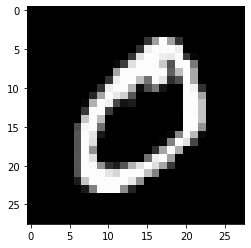

In [ ]:
plt.imshow(X_train[1], cmap='gray')

Reshaping

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(10000, 28, 28, 1)

Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(4,4), input_shape=(28,28,1), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(patience=1)


In [ ]:
early_stop

In [ ]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1430 - accuracy: 0.9575 - val_loss: 0.0573 - val_accuracy: 0.9827
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0477 - accuracy: 0.9857 - val_loss: 0.0442 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.0457 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0393 - val_accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0417 - val_accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0492 - val_accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0420 -

Performance

In [ ]:
import pandas as pd


In [ ]:
loss_df = pd.DataFrame(model.history.history)

In [ ]:
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.142998,0.957517,0.057275,0.9827
1,0.047689,0.985683,0.044218,0.9856
2,0.032102,0.989900,0.045716,0.9845
3,0.022054,0.993000,0.039320,0.9872
4,0.015969,0.994950,0.041662,0.9864


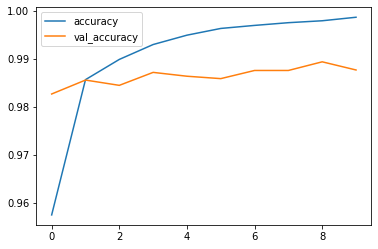

In [ ]:
loss_df[['accuracy', 'val_accuracy']].plot()

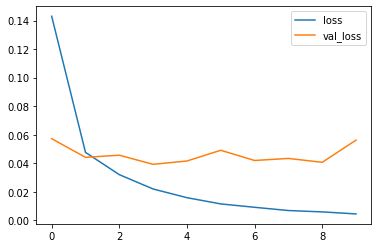

In [ ]:
loss_df[['loss', 'val_loss']].plot()

Testing

In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
predictions.shape

(10000, 10)

In [ ]:
predictions = np.argmax(predictions, axis =1)

In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
confusion_matrix(y_test, predictions)

array([[ 976,    0,    0,    0,    0,    0,    3,    0,    0,    1],
       [   1, 1121,    1,    2,    0,    2,    6,    1,    1,    0],
       [   1,    2, 1015,    1,    1,    0,    4,    5,    3,    0],
       [   0,    0,    2,  998,    0,    8,    0,    0,    1,    1],
       [   1,    0,    0,    0,  960,    0,    6,    0,    0,   15],
       [   1,    0,    0,    2,    0,  887,    1,    0,    0,    1],
       [   4,    0,    0,    0,    1,    1,  952,    0,    0,    0],
       [   1,    1,    4,    1,    0,    0,    0, 1014,    2,    5],
       [   5,    2,    1,    1,    0,    0,    2,    0,  956,    7],
       [   1,    0,    0,    2,    1,    4,    0,    1,    2,  998]])

In [ ]:
import seaborn as sns

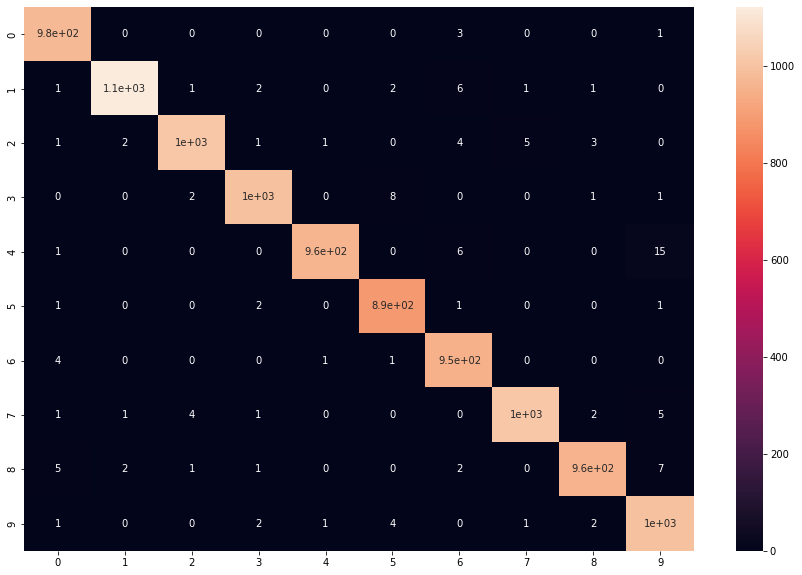

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [ ]:
y_test[1]

2